## Sentiment analysis IMDB feedback
### 1. Prepare data before train

load dataset (https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis).
   

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("IMDB_Dataset.csv", encoding= "latin1")
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Rename columns.

In [31]:
print(data.columns)
data.rename(columns={
    'review': 'text',
    'sentiment': 'target'
}, inplace=True)

Index(['review', 'sentiment'], dtype='object')


**The dataset looks like this after renaming the columns.**

In [32]:
print(data.head())

                                                text    target
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


**Check if the columns have empty values.**

In [33]:
print(data.isnull().sum())

text      0
target    0
dtype: int64


**Changed text values in the target column to boolean values for future model training.**

In [34]:
data['target'] = data['target'].map({
    'positive': 1,
    'negative': 0
})

**A countplot was used to check if each class in the dataset had the same number of samples.**

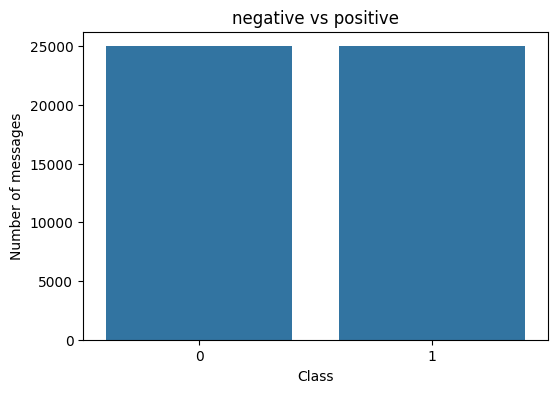

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=data) 
plt.title('negative vs positive')
plt.xlabel('Class')
plt.ylabel('Number of messages')
plt.show()

**Imported all necessary libraries for cleaning text.**

In [3]:
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
stop_words = set(stopwords.words('english'))
def clean_text(t):
    text = t.lower()                               
    text = re.sub(r'<[^>]+>', '', text)          
    text = re.sub(r'http\S+|www\S+', '', text)    
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)    
    
    text = ' '.join(word for word in word_tokenize(text) if word not in stop_words)

    return text

**Imported `tqdm` to track progress when processing text.**

In [38]:
from tqdm import tqdm
tqdm.pandas(desc="Normalizing text")

data['clean_text'] = data['text'].progress_apply(clean_text)
print(data['clean_text'])

Normalizing text: 100%|████████████████████████████████████████████████████████| 50000/50000 [00:43<00:00, 1140.98it/s]

0        one reviewers mentioned watching oz episode yo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: clean_text, Length: 50000, dtype: object


In [39]:
data.to_csv('sentimentIMDB.csv', index=False)

In [40]:
dataAfterClean = pd.read_csv('sentimentIMDB.csv', encoding= "latin1")
print(dataAfterClean.isnull().sum())

text          0
target        0
clean_text    0
dtype: int64


**Imported libraries for tokenizing text.**

In [41]:
from tqdm import tqdm
tqdm.pandas(desc="Normalizing text")

from nltk.tokenize import word_tokenize

def tokenize_text(t):
    words = word_tokenize(t)
    return words

In [42]:
dataAfterClean['clean_text'] = dataAfterClean['clean_text'].progress_apply(tokenize_text)

Normalizing text: 100%|████████████████████████████████████████████████████████| 50000/50000 [00:26<00:00, 1900.94it/s]


**Imported libraries for text lemmatization.**

In [43]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer

def lemmatization(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return lemmatized_words

In [44]:
dataAfterClean['clean_text'] = dataAfterClean['clean_text'].progress_apply(lemmatization)

Normalizing text: 100%|████████████████████████████████████████████████████████| 50000/50000 [00:32<00:00, 1553.33it/s]


In [45]:
print(dataAfterClean['clean_text'])

0        [one, reviewer, mentioned, watching, oz, episo...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there, family, little, boy, jake, ...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movie, high, art, f...
Name: clean_text, Length: 50000, dtype: object


**Imported libraries for text normalization.**

In [46]:
from autocorrect import Speller

normalization_dict = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "pls": "please",
    "plz": "please",
    "pos": "please",
    "thx": "thanks",
    "thanx": "thanks",
    "tx": "thanks",
    "k": "okay",
    "ok": "okay",
    "omg": "oh my god",
    "idk": "i do not know",
    "btw": "by the way",
    "brb": "be right back",
    "lol": "laughing out loud",
    "np": "no problem",
    "gr8": "great",
    "b4": "before",
    "l8r": "later",
    "cya": "see you",
    "tht": "that",
    "w/": "with",
    "w/o": "without",
    "msg": "message",
    "txt": "text",
    "im": "i am",
    "urself": "yourself",
    "bday": "birthday",
    "u2": "you too",
    "plsmsg": "please message",
    "fwd": "forward",
    "wknd": "weekend",
    "tmr": "tomorrow",
    "msgd": "messaged",
    "asap": "as soon as possible",
    "bbl": "be back later",
    "c": "see",
    "hru": "how are you",
    "ttyl": "talk to you later",
    "y": "why",
    "thru": "through",
    "luv": "love",
    "kthx": "okay thanks",
    "fr": "for real",
}

spell = Speller(lang='en')

def normalize_text(words):
    # words тут уже список слів
    normalized_words = [normalization_dict.get(word.lower(), word) for word in words]
    return normalized_words  # повертаємо список слів

In [47]:
dataAfterClean['clean_text'] = dataAfterClean['clean_text'].progress_apply(normalize_text)

Normalizing text: 100%|███████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 38610.05it/s]


In [49]:
dataAfterClean.to_csv('sentimentIMDB_ReadyForTrain.csv', index=False)

In [19]:
data = pd.read_csv('sentimentIMDB_ReadyForTrain.csv', encoding= 'latin1')

In [20]:
print(data['clean_text'])

0        one reviewer mentioned watching oz episode you...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    i am going disagree previous comment side malt...
49999    one expects star trek movie high art fan expec...
Name: clean_text, Length: 50000, dtype: object


### 2. Imported all necessary libraries to transform text into vectors for the neural network model. Split data. Train and test model.

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(data['clean_text'])

joblib.dump(tokenizer, "tokenizer.joblib")

sequences = tokenizer.texts_to_sequences(data['clean_text'])

X = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

y = data['target'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

**Used `tensorflow ` and `keras` to select the model architecture and compile it.”.**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D

In [23]:
vocab_size = len(tokenizer.word_index) + 1
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=200),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

D:\Python\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Trained the model using `model.fit` with 5 epochs, a batch size of 32, and validation data.**

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]:.2f}")

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 220s 193ms/step - accuracy: 0.8085 - loss: 0.4241 - val_accuracy: 0.8518 - val_loss: 0.3519
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 229s 203ms/step - accuracy: 0.8831 - loss: 0.2998 - val_accuracy: 0.8775 - val_loss: 0.3042
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 230s 205ms/step - accuracy: 0.9118 - loss: 0.2344 - val_accuracy: 0.8618 - val_loss: 0.3654
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 231s 205ms/step - accuracy: 0.9290 - loss: 0.1953 - val_accuracy: 0.8645 - val_loss: 0.3262
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 231s 205ms/step - accuracy: 0.9441 - loss: 0.1551 - val_accuracy: 0.8692 - val_loss: 0.4305
Test accuracy: 0.88


In [57]:
model.save("sentiment_model.keras")

In [14]:
model = tf.keras.models.load_model('sentiment_model.keras')

**Test model**

In [26]:
test_examples = [
    #Positive
    'The movie was very enjoyable. The story was clear and the acting was strong. It left a great impression.',
    'I loved the atmosphere of this film. It was exciting, emotional, and beautifully shot.',
    'A very entertaining movie. The plot was engaging and the characters felt real.',
    'This film exceeded my expectations. It was fun, well-paced, and visually impressive.',
    'A solid and satisfying watch. The story flowed smoothly and kept my attention.',
    #Negative
    'The movie felt slow and uninteresting. I struggled to stay focused.',
    'The plot was confusing and poorly developed. It didn’t make much sense.',
    'I expected much more. The story was weak and the ending felt rushed.',
    'It was hard to care about the characters. The film felt flat and forgettable.',
    'Overall, not very impressive. The pacing was uneven and the story lacked depth.',
]

test_examples = [clean_text(sent) for sent in test_examples]

sequence = tokenizer.texts_to_sequences(test_examples)

padded = pad_sequences(sequence, maxlen=200, padding='post', truncating='post')

predictions = model.predict(padded, verbose=1)


for i, (original, pred) in enumerate(zip(test_examples, predictions)):
    sentiment = "positive" if pred >= 0.5 else "negative"
    confidence = pred if pred >= 0.5 else 1 - pred
    
    print(f"\n--- Feedback {i+1} ---")
    print(f"Text: {original[:80]}...")
    print(f"Predict: {pred[0]:.4f}")
    print(f"sentiment: {sentiment.upper()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

--- Feedback 1 ---
Text: movie enjoyable story clear acting strong left great impression...
Predict: 0.9281
sentiment: POSITIVE

--- Feedback 2 ---
Text: loved atmosphere film exciting emotional beautifully shot...
Predict: 0.9951
sentiment: POSITIVE

--- Feedback 3 ---
Text: entertaining movie plot engaging characters felt real...
Predict: 0.8645
sentiment: POSITIVE

--- Feedback 4 ---
Text: film exceeded expectations fun well paced visually impressive...
Predict: 0.9614
sentiment: POSITIVE

--- Feedback 5 ---
Text: solid satisfying watch story flowed smoothly kept attention...
Predict: 0.9805
sentiment: POSITIVE

--- Feedback 6 ---
Text: movie felt slow uninteresting struggled stay focused...
Predict: 0.0211
sentiment: NEGATIVE

--- Feedback 7 ---
Text: plot confusing poorly developed didnt make much sense...
Predict: 0.0110
sentiment: NEGATIVE

--- Feedback 8 ---
Text: expected much story weak ending felt rushed...
Predict: 0.0403
sentiment: NE